In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp

import orc.data
import orc.models
import orc.rc

# Generate lorenz data

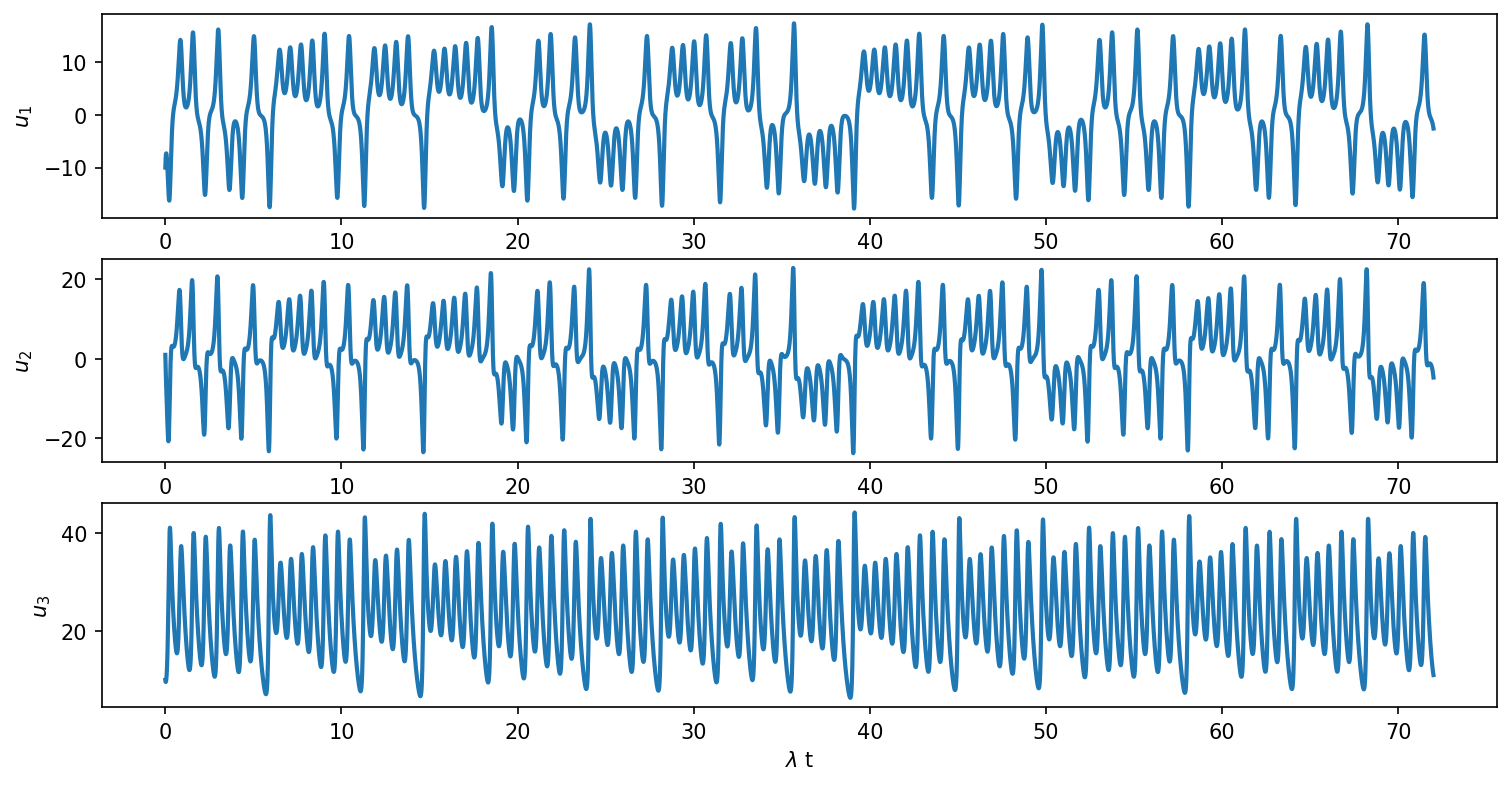

In [2]:
### Integrate + Plot Lorenz63 System

# integrate 
tN = 100
dt = 0.01
U,t = orc.data.lorenz63(tN=tN, dt=dt)

# train-test split
test_perc = 0.2
lyap = 0.9
split_idx = int((1 - test_perc) * U.shape[0])
U_train = U[:split_idx, :]
t_train = t[:split_idx] * lyap
U_test = U[split_idx:, :]
t_test = np.linspace(0, dt * U_test.shape[0], U_test.shape[0]) * lyap

# plot training data
fig, ax = plt.subplots(3, 1, figsize=(12, 6), dpi=150)
for i in range(3):
    ax[i].plot(t_train, U_train.T[i], linewidth=2)
    ax[i].set_ylabel(r"$u_{}$".format(i + 1))
ax[i].set_xlabel(r"$\lambda$ t")
plt.show()

In [3]:
# init + train ESN
NR = 1000
train_len = 3000
esn = orc.models.ESNForecaster(data_dim=3, res_dim=NR, seed=0)
r0 = jnp.zeros((NR,))
esn, R = orc.models.train_ESNForecaster(esn, U_train[-train_len-1:-1])

# forecast
U_pred = esn.forecast(fcast_len=U_test.shape[0], res_state=R[-1])

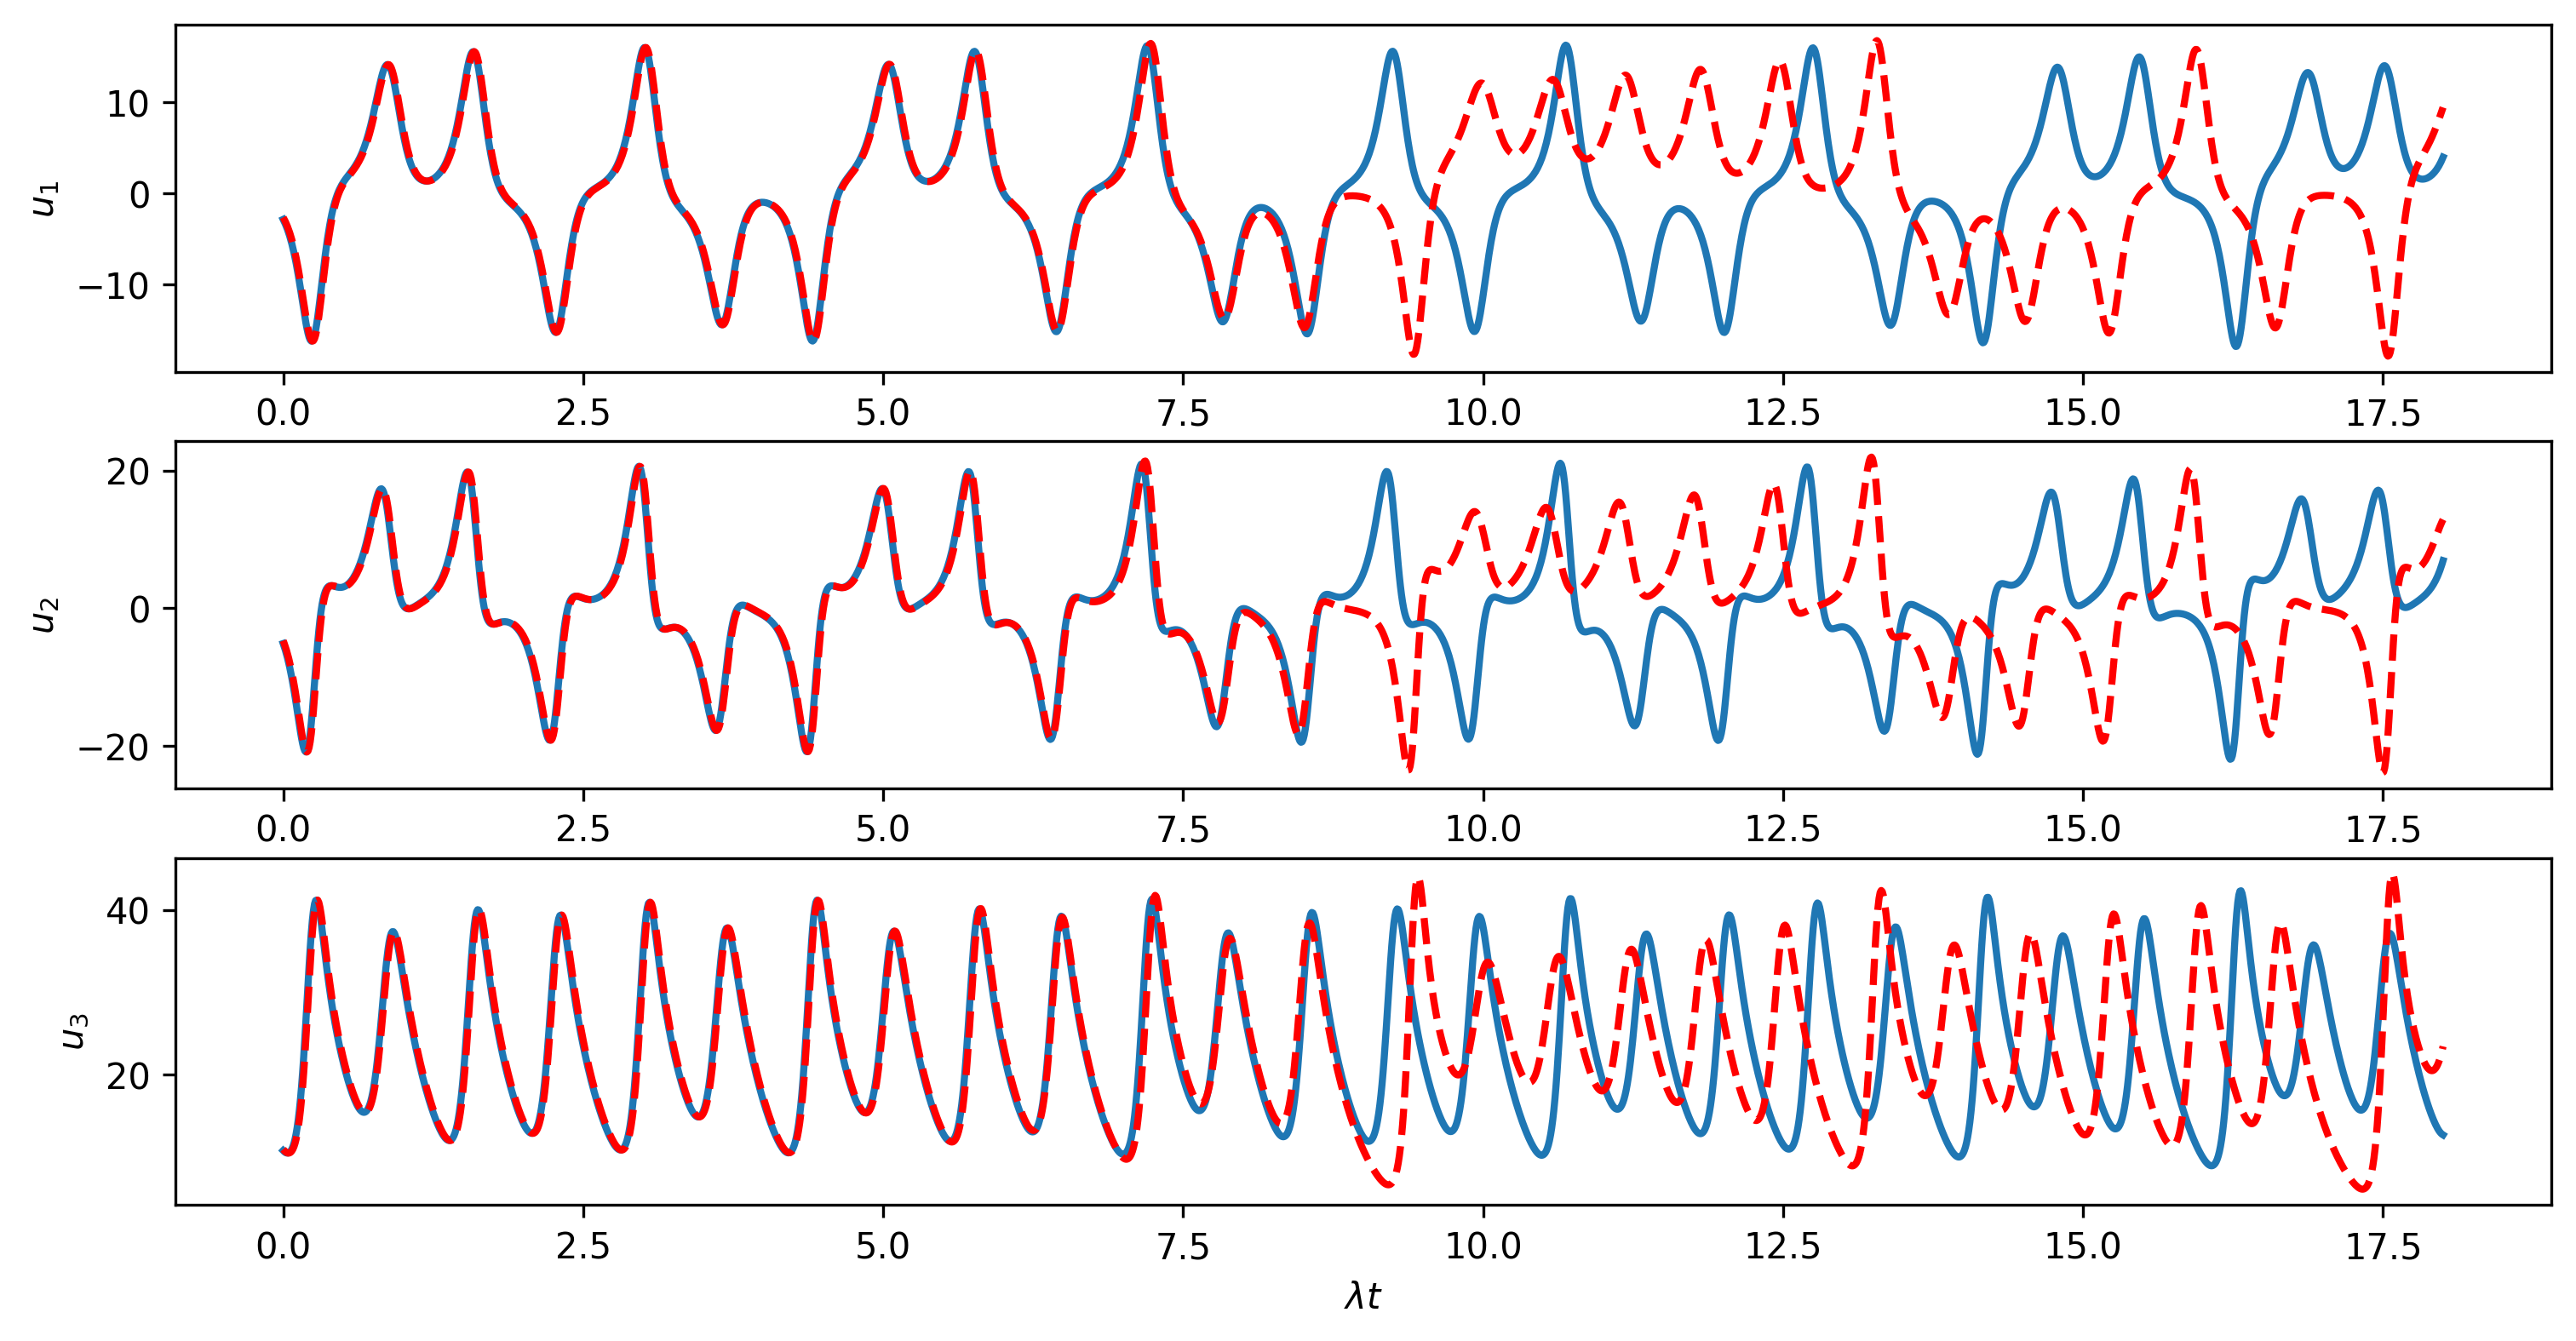

In [4]:
# plot forecast
lw = 2
fig, ax = plt.subplots(3, 1, figsize=(12, 6), dpi=300)
for i in range(3):
    ax[i].plot(t_test, U_test.T[i], label="True", linewidth=lw)
    ax[i].plot(t_test, U_pred.T[i], "r--", label="Predicted", linewidth=lw)
    ax[i].set_ylabel(r"$u_{}$".format(i + 1))
ax[i].set_xlabel(r"$\lambda t$")
plt.show()